### <center>**Assignment**</center>

In this assignment, you need to train regression models on [Beijing PM2.5 dataset](https://archive.ics.uci.edu/dataset/381/beijing+pm2+5+data) in winter of 2014.

1. You have to implement
    - a Linear (Polynomial) regressor
    - a Random Forest regressor
2. You need to show a residual plot for each of your model on both training data and testing data.
3. $R^2$ score of **at least one model** need to be larger than 0.72 on testing data.

### **Requirements:**

- Submit to eeclass with your code file `Lab04-3_{student_id}.ipynb` (e.g. `Lab04-2_110069999.ipynb`).
- **The code file should only contain the Assignment part.**
- Your .ipynb file should contains the output figures (the residual plots).
- Deadline: **2024-01-07 (Sun) 23:59**.

In [1]:
# Do not modify
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

# inline plotting instead of popping out
%matplotlib inline

df = pd.read_csv(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv',
    sep=',')
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [2]:
# Do not modify
df = df.drop(['cbwd'], axis=1)  # drop non-scalar feature
df = df.dropna(axis=0, how='any')  # drop samples who has nan feature
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,6.25,2,0


In [3]:
# Do not modify
idx = np.logical_or(
    np.logical_and(df['year'].values == 2014, df['month'].values < 3),
    np.logical_and(df['year'].values == 2013, df['month'].values == 12))
X = df.loc[idx].drop('pm2.5', axis=1)
y = df.loc[idx]['pm2.5'].values
X.head()

,No,year,month,day,hour,DEWP,TEMP,PRES,Iws,Is,Ir
34320,34321,2013,12,1,0,-13,-2.0,1026.0,0.89,0,0
34321,34322,2013,12,1,1,-14,-3.0,1025.0,3.13,0,0
34322,34323,2013,12,1,2,-13,-3.0,1025.0,0.89,0,0
34323,34324,2013,12,1,3,-13,-4.0,1025.0,0.89,0,0
34324,34325,2013,12,1,4,-13,-3.0,1025.0,1.78,0,0


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

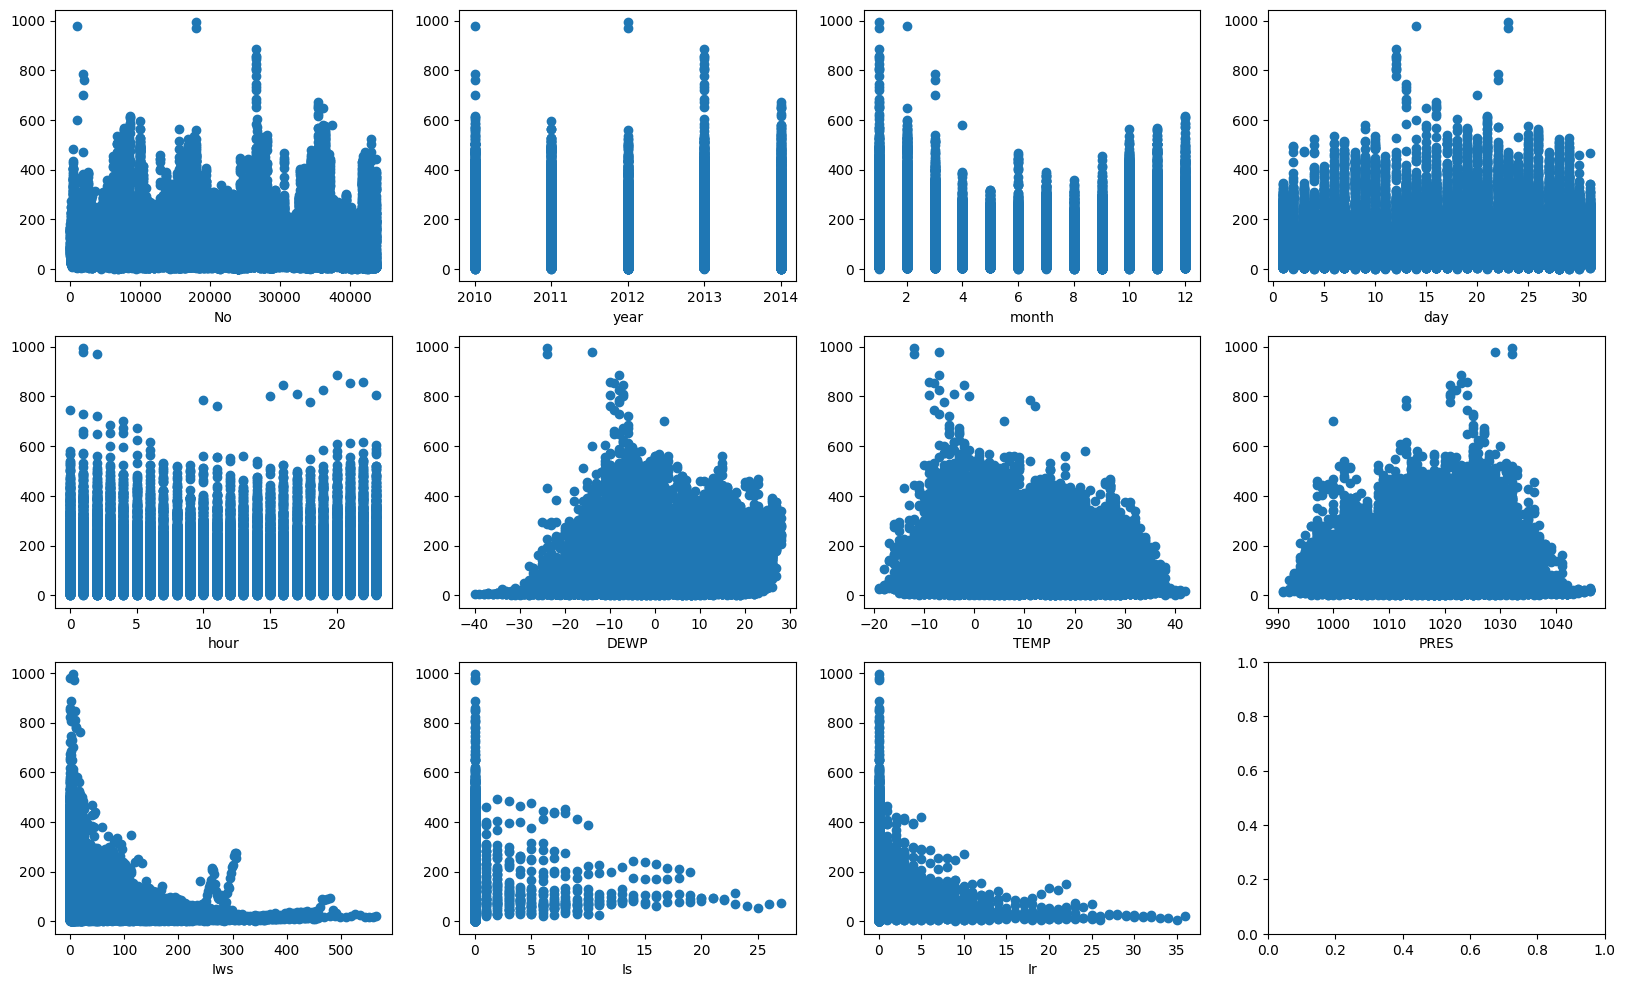

In [11]:
x_vars = [
    'No', 'year', 'month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is',
    'Ir'
]

_, subplot_arr = plt.subplots(3, 4, figsize=(20, 12))
for idx, x_var in enumerate(x_vars):
    x_idx = idx // 4
    y_idx = idx % 4
    subplot_arr[x_idx, y_idx].scatter(df[x_var], df['pm2.5'])
    subplot_arr[x_idx, y_idx].set_xlabel(x_var)

plt.show()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

print('# Training data points: %d' % X_train.shape[0])
print('# Testing data points: %d' % X_test.shape[0])

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Training
slr = LinearRegression()
slr.fit(X_train_std, y_train)

# Testing
y_train_pred = slr.predict(X_train_std)
y_test_pred = slr.predict(X_test_std)

print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred),
       mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred),
                                       r2_score(y_test, y_test_pred)))

# Training data points: 1704
# Testing data points: 426
MSE train: 8094.03, test: 9547.68
R^2 train: 0.48, test: 0.42


In [6]:
class LinearRegressionGD(object):
    def __init__(self, eta=0.001, n_iter=20, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            
            # Cost function
            error = (y - output)
            cost = (error ** 2).sum() / 2.0
            self.cost_.append(cost)
            
            # Update rule
            self.w_[1:] += self.eta * X.T.dot(error)
            self.w_[0] += self.eta * error.sum()
            
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In [15]:
# X_lin = df['LSTAT'].values[:, np.newaxis]
X_Iws = df['Iws'].values[:, np.newaxis]

regr = LinearRegression()

# Create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X_Iws)
X_cubic = cubic.fit_transform(X_Iws)

# Fit features
lin_regr = LinearRegression()
lin_regr.fit(X_Iws, y)
linear_r2 = r2_score(y, lin_regr.predict(X_Iws))

quad_regr = LinearRegression()
quad_regr.fit(X_quad, y)
quadratic_r2 = r2_score(y, quad_regr.predict(X_quad))

cubic_regr = LinearRegression()
cubic_regr.fit(X_cubic, y)
cubic_r2 = r2_score(y, cubic_regr.predict(X_cubic))

# Plot results
X_range = np.arange(X_Iws.min(), X_Iws.max(), 1)[:, np.newaxis]
y_lin_pred = lin_regr.predict(X_range)
y_quad_pred = quad_regr.predict(quadratic.fit_transform(X_range))
y_cubic_pred = cubic_regr.predict(cubic.fit_transform(X_range))

plt.scatter(X_Iws, y, label='Training points', color='lightgray')

plt.plot(
    X_range,
    y_lin_pred,
    label='Linear (d=1), $R^2=%.2f$' % linear_r2,
    color='blue',
    lw=2,
    linestyle=':')

plt.plot(
    X_range,
    y_quad_pred,
    label='Quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
    color='red',
    lw=2,
    linestyle='-')

plt.plot(
    X_range,
    y_cubic_pred,
    label='Cubic (d=3), $R^2=%.2f$' % cubic_r2,
    color='green',
    lw=2,
    linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [41757, 2130]